<a href="https://colab.research.google.com/github/jaiklen/-Elliptical-Curve-Cryptography/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Solution-1**

In [ ]:
!unzip /content/drive/MyDrive/endsem/gtfs.zip > /dev/null

In [ ]:
import pandas as pd

stops_data = pd.read_csv('stops.csv')

r_stop = pd.read_csv('route_stops.csv')

**1.a**

In [ ]:
stops_data.tail()

,stop_id,stop_code,stop_name,stop_lat,stop_lon
9586,9741,NaN,Vidhya Vihar Marg,28.721689,77.127519
9587,9742,NaN,Rohini Sec-18 B.Block,28.745060,77.137833
9588,9743,NaN,Model Basti,28.666727,77.169554
9589,9744,NaN,Nangloi JJ Colony Lokesh Cinema,28.682305,77.059387
9590,9745,NaN,Dwarka Sec-22/23 Xing,28.575480,77.111447


In [ ]:
stop_loc = {}
for i in range(len(stops_data)):
  id = stops_data['stop_id'][i]
  lat = stops_data['stop_lat'][i]
  lon = stops_data['stop_lon'][i]
  loc = [lat,lon]
  stop_loc[id] = loc
  


In [ ]:
r_stop.head()

,Unnamed: 0,route_id,stop_id
0,0,0,0
1,1,0,1
2,2,0,2
3,3,0,3
4,4,0,4


In [ ]:
!unzip /content/drive/MyDrive/endsem/bus_movements_2021_08_01.db.zip > /dev/null

In [ ]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("/content/bus_movements_2021_08_01.db")
df = pd.read_sql_query("SELECT * from vehicle_feed", con)

# Verify that result of SQL query is stored in the dataframe
#print(df.head())

con.close()

In [ ]:
df.head()

,vehicle_id,lat,lng,speed,route_id,trip_id,timestamp,date,time
0,DL1PD2506,28.6210384368896,76.9307708740234,0.0,1061.0,1061_17_10,1627756188,2021-07-31,00:00:03
1,DL1PD5292,28.6998844146729,77.0356063842773,0.0,895.0,895_20_10,1627756169,2021-07-31,00:00:03
2,DL1PD5053,28.6994438171387,77.0348968505859,0.0,250.0,250_17_20,1627756152,2021-07-31,00:00:03
3,DL1PD4123,28.5546207427979,77.0534515380859,0.0,484.0,484_19_30,1627755988,2021-07-31,00:00:03
4,DL1PD4688,28.7002754211426,77.0350036621094,0.0,674.0,674_20_50,1627756192,2021-07-31,00:00:03


In [ ]:
stop_route_dic = {}
for i in range(len(r_stop)):
  stop = int(r_stop['stop_id'][i])
  route = int(r_stop['route_id'][i])

  if(stop not in stop_route_dic):
    stop_route_dic[stop] = set([])
  stop_route_dic[stop].add(route)


In [ ]:
route_stop_dic = {}
for i in range(len(r_stop)):
  stop = int(r_stop['stop_id'][i])
  route = int(r_stop['route_id'][i])

  if(route not in route_stop_dic):
    route_stop_dic[route] = set([])
  route_stop_dic[route].add(stop)


In [ ]:
route_vehical_dic = {}
for i in range(len(df)):
  vehical = str(df['vehicle_id'][i])
  route = int(df['route_id'][i])

  if(route not in route_vehical_dic):
    route_vehical_dic[route] = set([])
  route_vehical_dic[route].add(vehical)


**1.b**

In [ ]:
total_buses = {}
stop_vehicle_dic = {}
for i in stop_route_dic:
  total_buses[i] = 0
  stop_vehicle_dic[i] = []
  for j in stop_route_dic[i]:
    if(j not in route_vehical_dic):
      continue
    else:
      total_buses[i] += len(route_vehical_dic[j])
      
      for t in route_vehical_dic[j]:
        stop_vehicle_dic[i].append(t)

**1.c**

In [ ]:
import numpy as np
import math
def find_stop_reached_in_route(stop_lat,stop_lon, bus_lats,bus_lons):
  bus_lats = bus_lats.astype(np.float64)
  bus_lons = bus_lons.astype(np.float64)
  stst = 6367 * 2 * np.arcsin(np.sqrt(
  np.sin((np.radians(bus_lats) - math.radians(stop_lat)) / 2) ** 2 + math.cos(
  math.radians(stop_lat)) * np.cos(np.radians(bus_lats)) * np.sin(
  (np.radians(bus_lons) - math.radians(stop_lon)) / 2) ** 2))
  if len(np.where(stst <= 0.1)[0].tolist())>0:
    return True
  else:
    return False

In [ ]:
total_passed_buses={}
for stop in stop_vehicle_dic:
  count=0
  stop_lat=stop_loc[stop][0]
  stop_lng=stop_loc[stop][1]
  con = sqlite3.connect("/content/bus_movements_2021_08_01.db")
  for vhc in set(stop_vehicle_dic):
    datafr = pd.read_sql_query("SELECT lat,lng,route_id from vehicle_feed WHERE vehicle_id="+"'"+str(vhc)+"'", con)
    datafr.set_index('route_id',inplace=True)
    datafr_routewise=datafr.groupby(datafr.index)
    for route in datafr_routewise.groups:
      if(stop in route_stop_dic[route]):
        temp_df=datafr_routewise.get_group(route)
        if(find_stop_reached_in_route(stop_lat,stop_lng,temp_df['lat'],temp_df['lng'])==True):
          count+=1
  total_passed_buses[stop]=count 
  break  
con.close()
print(count)

0


**1.d**

In [ ]:
ratio = {}
for i in total_buses:
  ratio[i] = total_buses/total_passed_buses

**1.e**

In [ ]:
t_bus = []
for i in total_buses:
  t_bus.append(i)

stop_data.insert(1, "total_buses", t_bus, True)

In [ ]:
t_bus_p = []
for i in total_passed_buses:
  t_bus_p.append(i)

stop_data.insert(2, "total_passed_buses", t_bus_p, True)

In [ ]:
rt = []
for i in ratio:
  rt.append(i)

stop_data.insert(3, "ratio", rt, True)

**1.f**

In [ ]:
final = stop_data[stop_data['total_buses'] >= 5]

In [ ]:
final.sort_values(["total_buses"], 
                    axis=0,
                    ascending=[True], 
                    inplace=True)

In [ ]:
final.to_csv('final_data.csv')

**Solution-2**

**2.1**

In [ ]:
import pandas as pd
data = pd.read_csv('final_data.csv')

In [ ]:
data.head()

,stop_id,total_buses,total_passed_buses,ratio,stop_code,stop_name,stop_lat,stop_lon
0,3987,5,3,0.6,U02079,Akbar Bhawan,28.586000,77.191100
1,4122,5,5,1.0,NaN,Sarita Vihar K Block,28.538333,77.291867
2,2896,5,4,0.8,U00742,Krishna Park,28.639100,77.081900
3,3979,5,5,1.0,U01724,Vasant Vihar Poorvi Marg,28.561300,77.169000
4,3978,5,5,1.0,U01275,NHW 8,28.569183,77.132600


In [22]:
import bokeh
from bokeh.plotting import figure, show, output_notebook

x = data['stop_id']
y = data['ratio']

p = figure(title = "first line plot", 
           x_axis_label  ="stop_id",
           y_axis_label =  "ratio",
           )


p.vbar(x = x, top = y, line_width=1)

GlyphRenderer(id='1676', ...)

In [23]:
output_notebook()
show(p)

In [24]:
min(data['ratio'])

0.007092198581560284

In [25]:
max(data['ratio'])

1.0

**2.2**

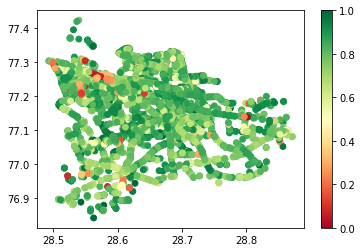

In [64]:
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('RdYlGn')
x = data['stop_lat']
y = data['stop_lon']
z = data['ratio']
sc = plt.scatter(x, y, c=z, vmin=0, vmax=1, s=35, cmap=cm)
plt.colorbar(sc)
plt.show()